In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from csv import writer
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0],True)

In [3]:
train_X = pd.read_csv('DataSet/trainX13.csv')
train_Y = pd.read_csv('DataSet/trainY13.csv')

trainY = train_Y.to_numpy()
trainX = train_X.to_numpy()
trainX = np.expand_dims(trainX,axis=2)

In [6]:
minimum = np.amin(trainX)
maximum = np.amax(trainX)

trainX = (trainX-minimum)/(maximum-minimum)

In [4]:
numberOfWebsites = 14
def my_model_sddec():

    input_1 = keras.Input(shape = (6000,1))

    conv1d_1 = layers.Conv1D(256,16,strides=3,padding='valid',activation='relu',use_bias=True,kernel_initializer='VarianceScaling',bias_initializer = 'Zeros')(input_1)#possibly update kernel_initializer
    max_pooling1d_1 = layers.MaxPooling1D(pool_size = 4,strides = 4, padding = 'same')(conv1d_1)

    conv1d_2 = layers.Conv1D(128,8,strides=3,padding='valid',activation='relu',use_bias=True,kernel_initializer='VarianceScaling',bias_initializer = 'Zeros')(max_pooling1d_1)#possibly update kernel_initializer
    max_pooling1d_2 = layers.MaxPooling1D(pool_size = 4,strides = 4, padding = 'same')(conv1d_2)

    conv1d_3 = layers.Conv1D(32,8,strides=3,padding='same',activation='relu',use_bias=True,kernel_initializer='VarianceScaling',bias_initializer = 'Zeros')(max_pooling1d_2)#possibly update kernel_initializer
    max_pooling1d_2 = layers.MaxPooling1D(pool_size = 4,strides = 4, padding = 'same')(conv1d_3)

    # conv1d_1 = layers.Conv1D(256,16,strides=3,padding='valid',activation='relu',use_bias=True,kernel_initializer='VarianceScaling',bias_initializer = 'Zeros')(input_1)#possibly update kernel_initializer
    
    # max_pooling1d_1 = layers.MaxPooling1D(pool_size = 4,strides = 4, padding = 'same')(conv1d_1)
    
    # conv1d_2 = layers.Conv1D(32,8,strides=3,padding='same',activation='relu',use_bias=True,kernel_initializer='VarianceScaling',bias_initializer = 'Zeros')(max_pooling1d_1)#possibly update kernel_initializer

    # max_pooling1d_2 = layers.MaxPooling1D(pool_size = 4,strides = 4, padding = 'same')(conv1d_2)

    #lstm_1 = layers.LSTM(32,activation='tanh',recurrent_activation='hard_sigmoid',use_bias=True,kernel_initializer='VarianceScaling',recurrent_initializer = 'orthogonal',bias_initializer='Zeros', return_sequences = True)(max_pooling1d_2) #Variance Scaling

    flatten_1 = layers.Flatten()(max_pooling1d_2)

    #dropout_1 = layers.Dropout(0.3)(flatten_1)

    #dense_1 = layers.Dense(300,activation = 'relu')(dropout_1)

    dropout_2 = layers.Dropout(0.15)(flatten_1)

    dense_2= layers.Dense(numberOfWebsites, kernel_regularizer = 'l2',activation = 'softmax', kernel_initializer = 'VarianceScaling', bias_initializer = 'zeros')(dropout_2)

    model = keras.Model(inputs = input_1, outputs = dense_2)
    return model

In [7]:

model = my_model_sddec()

model.compile(
	loss=keras.losses.SparseCategoricalCrossentropy(),
	optimizer=keras.optimizers.Adam(),
	metrics=["accuracy"]
)

history = model.fit(trainX, trainY,validation_split = 0.3, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
74/74 [==============================] - 1s 8ms/step - loss: 2.3461 - accuracy: 0.2579 - val_loss: 2.0422 - val_accuracy: 0.4187
Epoch 2/20
74/74 [==============================] - 0s 6ms/step - loss: 1.4464 - accuracy: 0.5574 - val_loss: 1.2382 - val_accuracy: 0.7024
Epoch 3/20
74/74 [==============================] - 0s 6ms/step - loss: 0.8122 - accuracy: 0.7983 - val_loss: 0.8379 - val_accuracy: 0.8413
Epoch 4/20
74/74 [==============================] - 0s 5ms/step - loss: 0.5994 - accuracy: 0.8315 - val_loss: 0.8078 - val_accuracy: 0.8591
Epoch 5/20
74/74 [==============================] - 0s 6ms/step - loss: 0.4623 - accuracy: 0.8740 - val_loss: 0.7683 - val_accuracy: 0.8671
Epoch 6/20
74/74 [==============================] - 0s 6ms/step - loss: 0.3536 - accuracy: 0.9132 - val_loss: 0.7913 - val_accuracy: 0.8849
Epoch 7/20
74/74 [==============================] - 0s 6ms/step - loss: 0.3166 - accuracy: 0.9277 - val_loss: 0.8100 - val_accuracy: 0.8750
Epoch 8/20
74/74 [==

In [8]:
model.save('TrainedModel/trainedModel.h5',save_format='h5')

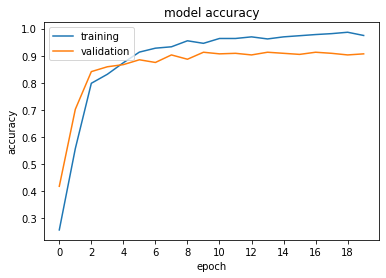

In [9]:

fig = plt.figure()

#plotting

plt.locator_params(axis="x", nbins=20)
plt.locator_params(axis="y", nbins=10)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
fig.savefig('plot.png')